# SDSC3006 Group Project

## Steel Plates Faults Dataset (27 attributes, 1941 instances)

### Loading library

In [1]:
# Dev lib
# library(diffobj)


In [2]:
# Prod  lib
library(ggplot2)
library(reshape2)
library(pROC)
library(caret)
library(e1071)
library(factoextra)

# library(haven)
# library(rpart)
# library(rpart.plot)


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: lattice

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
plotCM2Heatmap <- function(table) {
   ggplot(data = melt(table), aes(x = Prediction, y = Reference, fill = value)) +
      geom_tile(color = "black") +
      geom_text(aes(label = value)) +
      scale_fill_gradientn(colours = heat.colors(100, rev = TRUE)) +
      coord_fixed() +
      theme_grey(base_size = 14) +
      theme(legend.position = "none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 315, hjust = 0))
}


In [4]:
plotMultiRoc <- function(prediction, predictor, arrow) {
   set.seed(0)
   auc <- multiclass.roc(prediction, predictor, direction=arrow)
   for (i in 1:length(auc$rocs)) {
      plot.roc(auc$rocs[[i]], add = (if (i == 1) F else T), legacy.axes = T, lwd = 2, col = sample.int(100))
   }
}

### Set random seed

In [5]:
seed <- 0
print(seed)


[1] 0


### Load dataset

In [6]:
df <- read.table("Faults.NNA", col.names = as.vector(read.table("Faults27x7_var")$V1))
df.X <- scale(df[1:27])
df.Y <- data.frame(Faults = factor(names(df[28:34])[max.col(df[28:34])]))


### PCA Tranformation 

In [7]:
df.pca <- prcomp(df[, -length(df)], scale = TRUE)
df.pcaX <- df.pca$x


In [8]:
# fviz_eig(df.pca, addlabels = TRUE)
# fviz_pca_var(df.pca, col.var = "cos2", repel = TRUE)


### Split dataset

In [9]:
set.seed(seed)
rand <- sample(nrow(df), nrow(df) * 0.8)

df.train.X <- df.X[rand, ]
df.train.Y <- df.Y[rand, ]
df.train.pcaX <- df.pcaX[rand, ]

df.test.X <- df.X[-rand, ]
df.test.Y <- df.Y[-rand, ]
df.test.pcaX <- df.pcaX[-rand, ]


### Naive Bayes

#### Without PCA

In [10]:
set.seed(seed)
gnb.model <- naiveBayes(df.train.X, df.train.Y)
gnb.train.yPred <- predict(gnb.model, df.train.X)
gnb.test.yPred <- predict(gnb.model, df.test.X)

gnb.train.cm <- confusionMatrix(gnb.train.yPred, df.train.Y)
gnb.test.cm <- confusionMatrix(gnb.test.yPred, df.test.Y)

gnb.train.cm$overall["Accuracy"]
gnb.test.cm$overall["Accuracy"]


Accuracy 
0.6101804

Accuracy 
0.6118252

##### Confusion Matrix Heat map

Training Set

In [11]:
# plotCM2Heatmap(gnb.train.cm$table)


Testing Set

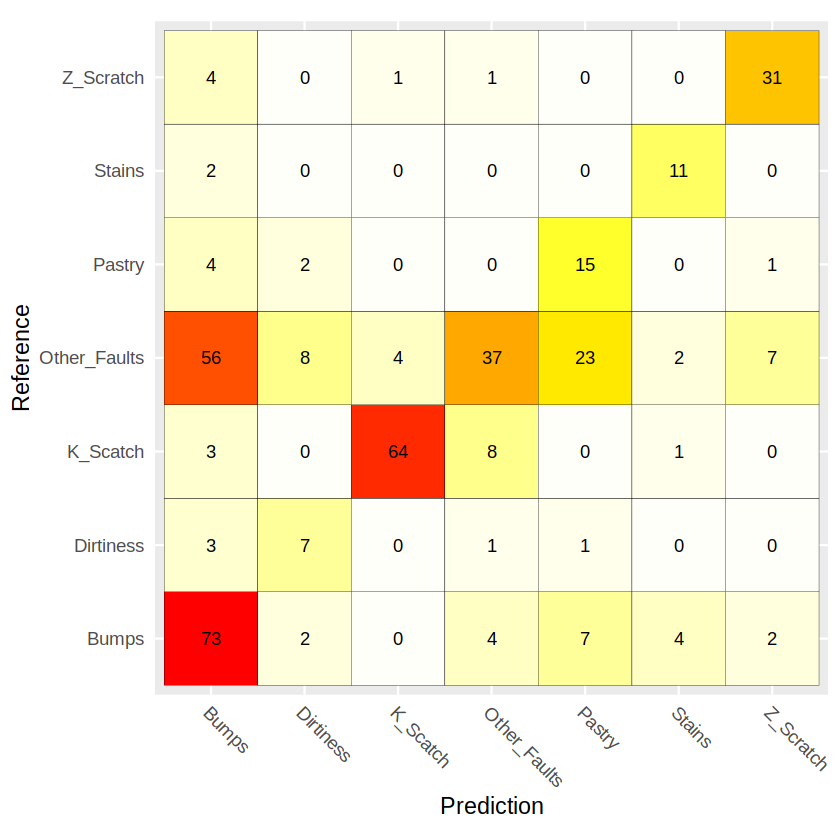

In [12]:
plotCM2Heatmap(gnb.test.cm$table)


##### Area under Curve

Training Set

In [13]:
# plotMultiRoc(gnb.train.yPred, as.numeric(df.train.Y), "<")



Testing Set

In [14]:
# plotMultiRoc(gnb.test.yPred, as.numeric(df.test.Y), "<")


#### With PCA

In [15]:
set.seed(seed)
gnb.pca <- naiveBayes(df.train.pcaX, df.train.Y)
gnb.train.yPredPca <- predict(gnb.pca, df.train.pcaX)
gnb.test.yPredPca <- predict(gnb.pca, df.test.pcaX)

gnb.train.cmPca <- confusionMatrix(gnb.train.yPredPca, df.train.Y)
gnb.test.cmPca <- confusionMatrix(gnb.test.yPredPca, df.test.Y)

gnb.train.cmPca$overall["Accuracy"]
gnb.test.cmPca$overall["Accuracy"]

Accuracy 
0.9555412

Accuracy 
0.9562982

##### Confusion Matrix Heat map

Training Set

In [16]:
# plotCM2Heatmap(gnb.train.cmPca$table)


Testing Set

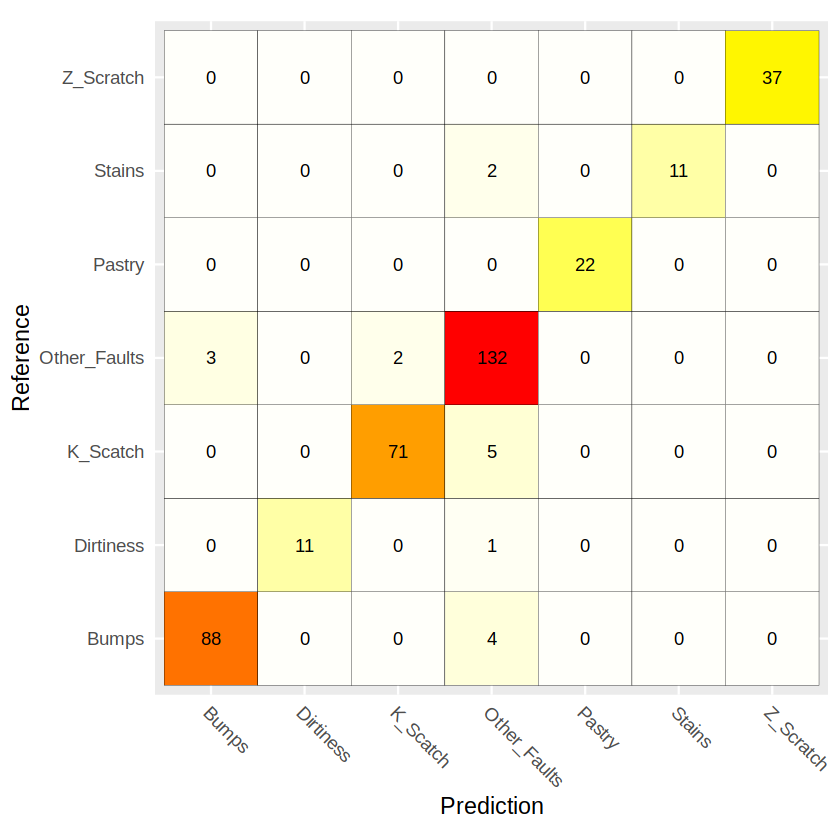

In [17]:
plotCM2Heatmap(gnb.test.cmPca$table)


##### Area under Curve

Training Set

In [18]:
# plotMultiRoc(gnb.train.yPredPca, as.numeric(df.train.Y), "<")



Testing Set

In [19]:
# plotMultiRoc(gnb.test.yPredPca, as.numeric(df.test.Y), "<")


### Logistic Regression

### LDA or QDA

### KNN

### Classification Tree

### SVM